<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">دیتاست Fashion MNIST</div></center></h1>

https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation,Flatten,Dropout
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
np.random.seed(123)  # for reproducibility

## Explore the data:

In [ ]:
(x_train,y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
#Each label is an integer between 0 and 9:#The number of classes
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28)

## Process the data:

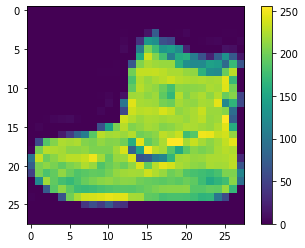

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

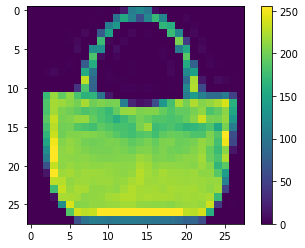

In [ ]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=10) #change one hot encoder
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
y_train.shape

(60000, 10)

## Build the model:

In [ ]:
image_shape = (28, 28)
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Feed the model


In [ ]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=64, validation_split=0.2
          )    

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7614 - accuracy: 0.7488 - val_loss: 0.4544 - val_accuracy: 0.8435
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4319 - accuracy: 0.8471 - val_loss: 0.4061 - val_accuracy: 0.8533
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3876 - accuracy: 0.8632 - val_loss: 0.3987 - val_accuracy: 0.8575
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3621 - accuracy: 0.8724 - val_loss: 0.3656 - val_accuracy: 0.8723
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3325 - accuracy: 0.8784 - val_loss: 0.3662 - val_accuracy: 0.8690
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3249 - accuracy: 0.8833 - val_loss: 0.3601 - val_accuracy: 0.8742
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3085 - accuracy: 0.8878 - val_loss: 0.3541 - val_accuracy: 0.8752
Epoch 

## Evaluate Accuracy

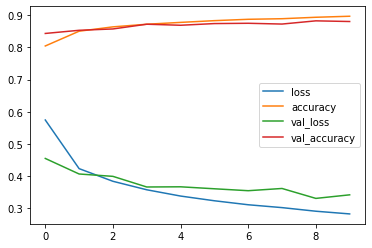

In [ ]:
#plot the loss
import pandas as pd
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=0)
print('\nTesting loss: %.2f, acc: %.2f%%'%(test_loss, test_acc))


Testing loss: 0.36, acc: 0.87%


In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
print('\nTraining loss: %.2f, acc: %.2f%%'%(train_loss, train_acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2817 - accuracy: 0.8978

Training loss: 0.28, acc: 0.90%


## Convolutional Model

In [ ]:
#(n_samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#x_train = tf.expand_dims(x_train, axis=-1)
#x_test = tf.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model1 = Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28,1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model1.fit(x_train_con, y_train, epochs=10, batch_size=64, validation_split=0.2 )    

Epoch 1/10
750/750 [==============================] - 41s 54ms/step - loss: 1.0494 - accuracy: 0.6200 - val_loss: 0.4504 - val_accuracy: 0.8320
Epoch 2/10
750/750 [==============================] - 40s 54ms/step - loss: 0.5173 - accuracy: 0.8134 - val_loss: 0.3733 - val_accuracy: 0.8618
Epoch 3/10
750/750 [==============================] - 41s 55ms/step - loss: 0.4249 - accuracy: 0.8475 - val_loss: 0.3411 - val_accuracy: 0.8766
Epoch 4/10
750/750 [==============================] - 42s 56ms/step - loss: 0.3777 - accuracy: 0.8687 - val_loss: 0.3179 - val_accuracy: 0.8812
Epoch 5/10
750/750 [==============================] - 42s 56ms/step - loss: 0.3512 - accuracy: 0.8762 - val_loss: 0.3065 - val_accuracy: 0.8840
Epoch 6/10
750/750 [==============================] - 42s 55ms/step - loss: 0.3232 - accuracy: 0.8869 - val_loss: 0.2862 - val_accuracy: 0.8940
Epoch 7/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2978 - accuracy: 0.8950 - val_loss: 0.2800 - val_accuracy: